<a href="https://www.kaggle.com/code/itsmegood/playground-series-season-3-2-stroke-prediction?scriptVersionId=116542470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import seaborn as sns

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


# Exploratory Data Analysis

In [2]:
testset = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
# delete useless column
df = df.drop('id', axis=1)

# Correcting wrong datatype
columns_to_convert = ['stroke', 'hypertension', 'heart_disease']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [6]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

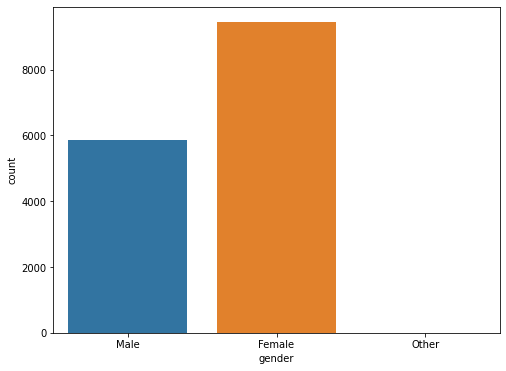

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'gender', data = df)
plt.show()

In [8]:

one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
one_hot_gender.head()

,gender_Female,gender_Male,gender_Other
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [9]:
df = pd.concat([df, one_hot_gender], axis=1, join='inner')

In [10]:
df = df.drop('gender', axis=1)

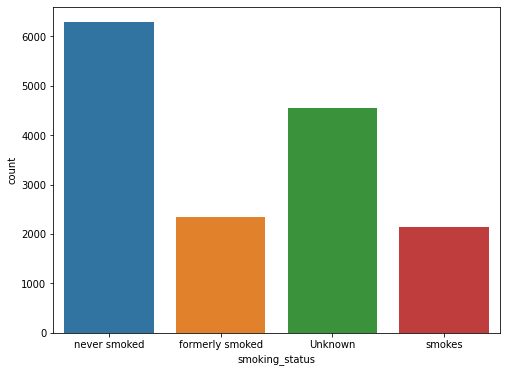

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'smoking_status', data = df)
plt.show()

In [12]:
df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], ['1', '0'])
df['work_type'] = df['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                                          ['0', '1', '2', '3', '4'])
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'], ['1', '0'])
df['smoking_status'] = df['smoking_status'].replace(['never smoked', 'formerly smoked', 'Unknown', 'smokes'], 
                                                    ['0', '1', '2', '3'])

In [13]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,28.0,0,0,1,0,1,79.53,31.1,0,0,0,1,0
1,33.0,0,0,1,0,0,78.44,23.9,1,0,0,1,0
2,42.0,0,0,1,0,0,103.00,40.3,2,0,1,0,0
3,56.0,0,0,1,0,1,64.87,28.8,0,0,0,1,0
4,24.0,0,0,0,0,0,73.36,28.8,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,22.0,0,0,0,2,1,72.63,19.5,0,0,1,0,0
15300,46.0,1,0,1,0,1,101.19,32.1,0,0,1,0,0
15301,75.0,0,0,1,1,1,87.69,26.2,0,0,1,0,0
15302,46.0,0,0,1,0,0,101.13,22.5,2,0,0,1,0


In [14]:
df.dtypes

age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
gender_Female          uint8
gender_Male            uint8
gender_Other           uint8
dtype: object

## Split the Data

In [15]:
from sklearn.model_selection import train_test_split

# Attribute
x = df[['gender_Female','gender_Male', 'gender_Other','age','hypertension', 'heart_disease',
       'ever_married', 'work_type','Residence_type',
        'avg_glucose_level', 'bmi', 'smoking_status']]

# Label
y = df['stroke']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
print("Data Shape: ", df.shape)
print("Train Shape: ", X_train.shape, y_train.shape)
print("Test Shape: ", X_test.shape, y_test.shape)

Data Shape:  (15304, 13)
Train Shape:  (12243, 12) (12243,)
Test Shape:  (3061, 12) (3061,)


# CREATING MODEL

## Decision Tree

In [17]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()

history_tree = model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.932375040836328

## Linear Regression

In [18]:
from sklearn import linear_model

model_linear = linear_model.LogisticRegression(max_iter=1000)

model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)

0.9601437438745508

# PREDICTING PROBABILITY

## PRE-PROCESS THE TEST SET

In [19]:
df1 = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')

columns_to_convert_1 = ['hypertension', 'heart_disease']
df1[columns_to_convert_1] = df1[columns_to_convert_1].astype(str)

one_hot_gender_1 = pd.get_dummies(df1.gender, prefix='gender')
one_hot_gender_1.head()

df1 = pd.concat([df1, one_hot_gender_1], axis=1, join='inner')
df1 = df1.drop('gender', axis=1)

df1['ever_married'] = df1['ever_married'].replace(['Yes', 'No'], ['1', '0'])
df1['work_type'] = df1['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                                          ['0', '1', '2', '3', '4'])
df1['Residence_type'] = df1['Residence_type'].replace(['Urban', 'Rural'], ['1', '0'])
df1['smoking_status'] = df1['smoking_status'].replace(['never smoked', 'formerly smoked', 'Unknown', 'smokes'], 
                                                    ['0', '1', '2', '3'])
df1 = df1.drop('id', axis=1)

In [20]:
df1

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other
0,57.0,0,0,1,0,0,82.54,33.4,2,1,0,0
1,70.0,1,0,1,0,1,72.06,28.5,2,0,1,0
2,5.0,0,0,0,3,1,103.72,19.5,2,1,0,0
3,56.0,0,0,1,2,1,69.24,41.4,3,1,0,0
4,32.0,0,0,1,0,0,111.15,30.1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10199,27.0,0,0,0,0,1,75.77,17.6,0,1,0,0
10200,49.0,0,0,1,0,1,102.91,26.7,2,0,1,0
10201,3.0,0,0,0,3,0,104.04,18.3,2,1,0,0
10202,31.0,0,0,1,0,1,82.41,28.7,0,0,1,0


## PREDICT

In [23]:
# using Linear Regression Model for better accuracy

probability = model_linear.predict_proba(df1)[:,1]
probability

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
final_result = pd.DataFrame ({'id': testset.id,
                             'stroke' : probability})
final_result

,id,stroke
0,15304,6.496649e-13
1,15305,7.643709e-13
2,15306,5.065472e-10
3,15307,3.156099e-12
4,15308,9.219169e-13
...,...,...
10199,25503,2.301126e-10
10200,25504,4.740070e-13
10201,25505,6.343882e-10
10202,25506,2.476549e-11


In [25]:
final_result.to_csv('submission.csv', index=False)